#Predicting House Prices In Bengaluru
-------------------------------------------------------
What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor -- the price? Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank. For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category. Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.   So what determines the property prices in Namma Bengaluru? Data : The train and test data will consist of various features that describe that property in Bengaluru. This is an actual data set that is curated over months of primary & secondary research by our team. Each row contains fixed size object of features. There are 9 features and each feature can be accessed by its name. Features Area_type - describes the area Availability - when it can be possessed or when it is ready(categorical and time-series) Location - where it is located in Bengaluru Price - Value of the property in lakhs(INR) Size - in BHK or Bedroom (1-10 or more) Society - to which society it belongs Total_sqft - size of the property in sq.ft Bath - No. of bathrooms Balcony - No. of the balcony Problem Statement With the given 9 features(categorical and continuous) build a model to predict the price of houses in Bengaluru.


Need to Predict -- House Price in Bengaluru for test data?<br>


In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import mode



In [183]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [184]:
train['data']='train'
test['data']='test'

In [185]:
train.shape,test.shape

((13320, 10), (1480, 10))

In [186]:
train.columns,test.columns

(Index(['area_type', 'availability', 'location', 'size', 'society',
        'total_sqft', 'bath', 'balcony', 'price', 'data'],
       dtype='object'),
 Index(['area_type', 'availability', 'location', 'size', 'society',
        'total_sqft', 'bath', 'balcony', 'price', 'data'],
       dtype='object'))

In [187]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train


In [188]:
test.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN,test
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN,test
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN,test
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN,test
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN,test


#Decriptive Analytics
--------------------------------------



In [189]:
data=pd.concat([train,test])

In [190]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN,test
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


In [191]:
data = data.reset_index().drop(columns="index")

In [192]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN,test
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14800 non-null  object 
 1   availability  14800 non-null  object 
 2   location      14799 non-null  object 
 3   size          14782 non-null  object 
 4   society       8672 non-null   object 
 5   total_sqft    14800 non-null  object 
 6   bath          14720 non-null  float64
 7   balcony       14122 non-null  float64
 8   price         13320 non-null  float64
 9   data          14800 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [194]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,14720.0,2.698709,1.343932,1.0,2.0,2.0,3.0,40.0
balcony,14122.0,1.582141,0.819147,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [195]:
data[data.duplicated()].sum()



area_type       Super built-up  AreaSuper built-up  AreaSuper ...
availability    Ready To MoveReady To MoveReady To MoveReady T...
location        Haralur RoadHaralur RoadVittasandraHaralur Roa...
size            3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2...
total_sqft      1464102712461194102716931330107514641140116112...
bath                                                         1291
balcony                                                       906
price                                                     37137.1
data            traintraintraintraintraintraintraintraintraint...
dtype: object

In [196]:
numeric_columns=data.select_dtypes(include=np.number).drop(columns=["price"]).columns

In [197]:
numeric_columns

Index(['bath', 'balcony'], dtype='object')

In [198]:
category_columns=data.select_dtypes(exclude=np.number).columns

In [199]:
category_columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'data'],
      dtype='object')

In [200]:
data[category_columns]

,area_type,availability,location,size,society,total_sqft,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,train
...,...,...,...,...,...,...,...
14795,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,test
14796,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,test
14797,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,test
14798,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,test


In [201]:
data[category_columns].apply(lambda x: x.nunique())

area_type          4
availability      82
location        1358
size              32
society         2832
total_sqft      2221
data               2
dtype: int64

In [202]:
data.apply(lambda x: x.nunique())

area_type          4
availability      82
location        1358
size              32
society         2832
total_sqft      2221
bath              19
balcony            4
price           1994
data               2
dtype: int64

In [203]:
data[numeric_columns].apply(lambda x: print(x.value_counts()))

2.0     7652
3.0     3657
4.0     1375
1.0      871
5.0      586
6.0      303
7.0      113
8.0       73
9.0       52
10.0      17
12.0       7
13.0       3
11.0       3
16.0       3
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64
2.0    5658
1.0    5444
3.0    1861
0.0    1159
Name: balcony, dtype: int64


bath       None
balcony    None
dtype: object

In [204]:
data[category_columns].apply(lambda x: print(x.value_counts()))

Super built-up  Area    9736
Built-up  Area          2688
Plot  Area              2279
Carpet  Area              97
Name: area_type, dtype: int64
Ready To Move    11743
18-Dec             351
18-May             324
18-Apr             296
18-Aug             225
                 ...  
16-Apr               1
16-Nov               1
15-Aug               1
16-Oct               1
14-Nov               1
Name: availability, Length: 82, dtype: int64
Whitefield                        591
Sarjapur  Road                    437
Electronic City                   337
Kanakpura Road                    298
Thanisandra                       277
                                 ... 
Chaitanya Ananya                    1
East Colony                         1
Subramanya Nagar                    1
Banashankari3rd stage bigbazar      1
Munireddy Layout                    1
Name: location, Length: 1358, dtype: int64
2 BHK         5739
3 BHK         4788
4 Bedroom      918
4 BHK          673
3 Bedroom      613


area_type       None
availability    None
location        None
size            None
society         None
total_sqft      None
data            None
dtype: object

In [205]:
data.isna().sum()

area_type          0
availability       0
location           1
size              18
society         6128
total_sqft         0
bath              80
balcony          678
price           1480
data               0
dtype: int64

#Observation
----------------
Observations: - 
•	Concatenate the train& test data
o	Add column (train/test) to differentiate the data 

•	Check data info
o	3(bath,balcony & price) are float values
o	Remaining are object
•	Check data describe
•	Check Duplicates
o	No need to remove duplicates here. As these will be same for different data
•	Check null value 
•	Check whether we can replace null by any other value (mode/mean/unknown)
o	location is 1 null  --- this is train data, so we can remove this
o	Bedroom size is 18 null .----> Area =Plot Area and availability = Immediate Possession are null and bath and balcony are also null. we .Fill with Unknown and then fill with mode of bedroom size(2)
o	society is 6128, check location or train or test data--> fill with Unknown.
o	bath is 80 null ---> can be replaced by mode of bedroom size.
o	balcony is 678 null ---> can be replaced by 0 since some time no balcony is available.

•	Group the values 
o	Rename Bedroom size.
o	Sqrft - Covert number or do proper rename.



Exploratory Data Analysis (EDA)

<AxesSubplot:ylabel='Frequency'>

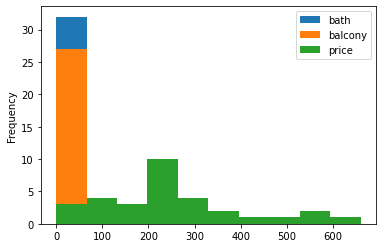

In [206]:
data.groupby(data["size"]).mean().plot(kind='hist')

In [207]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14800 non-null  object 
 1   availability  14800 non-null  object 
 2   location      14799 non-null  object 
 3   size          14782 non-null  object 
 4   society       8672 non-null   object 
 5   total_sqft    14800 non-null  object 
 6   bath          14720 non-null  float64
 7   balcony       14122 non-null  float64
 8   price         13320 non-null  float64
 9   data          14800 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [208]:
data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,train
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,train
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00,train
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25,train
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00,train


<AxesSubplot:xlabel='location'>

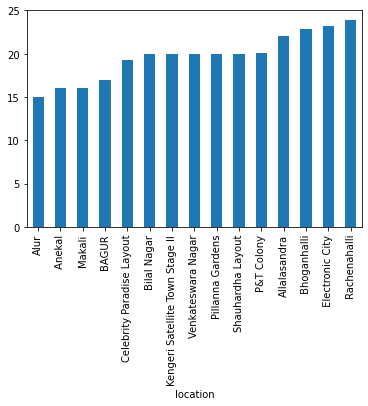

In [209]:
data.groupby(data["location"]).price.mean().sort_values(ascending=True).head(15).plot(kind='bar')

<AxesSubplot:xlabel='size'>

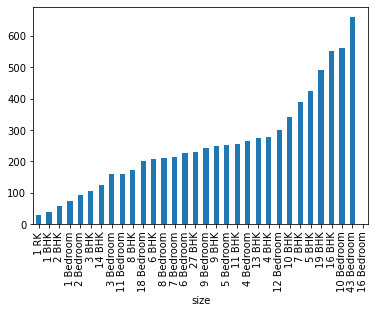

In [210]:
data.groupby(data["size"]).price.mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='location'>

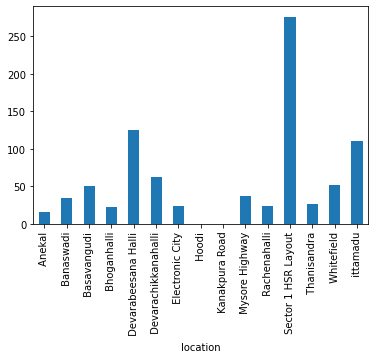

In [211]:
data.groupby(data["location"]).price.mean().head(15).plot(kind='bar')

<AxesSubplot:xlabel='society'>

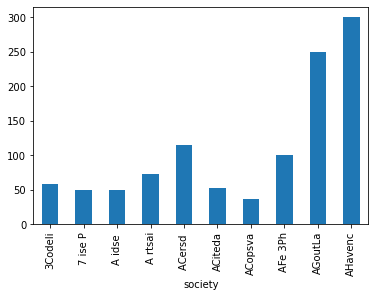

In [212]:
data.groupby(data["society"]).price.mean().head(10).plot(kind='bar')

<AxesSubplot:>

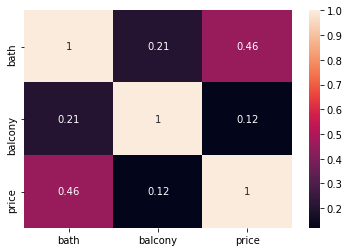

In [213]:
sns.heatmap(data.corr(),annot=True)

#Data Preprocessing
-----------------------------


#location is 1 null  --- this is train data, so we can remove this
-------------------------------------------------------------------

In [214]:
data["location"].isna().sum()

1

In [215]:
data[data["location"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0,train


In [216]:
data.dropna(subset=["location"],inplace=True)


In [217]:
data[data["location"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data


#:rename Bedroom size.
-----------------------------------
______________________________

In [218]:


data["size"].value_counts()

2 BHK         5739
3 BHK         4787
4 Bedroom      918
4 BHK          673
3 Bedroom      613
1 BHK          592
2 Bedroom      368
5 Bedroom      338
6 Bedroom      208
1 Bedroom      122
7 Bedroom       95
8 Bedroom       94
5 BHK           61
9 Bedroom       54
6 BHK           35
7 BHK           18
10 Bedroom      15
1 RK            15
9 BHK           13
8 BHK            8
10 BHK           2
11 Bedroom       2
11 BHK           2
19 BHK           1
43 Bedroom       1
14 BHK           1
18 Bedroom       1
12 Bedroom       1
16 BHK           1
27 BHK           1
13 BHK           1
16 Bedroom       1
Name: size, dtype: int64

In [219]:
data["size"].replace({'1 Bedroom':'1 BHK','2 Bedroom':'2 BHK','3 Bedroom':'3 BHK','4 Bedroom':'4 BHK','5 Bedroom':'5 BHK','6 Bedroom':'6 BHK','7 Bedroom':'7 BHK','8 Bedroom':'8 BHK','9 Bedroom':'9 BHK','10 Bedroom':'10 BHK','11 Bedroom':'11 BHK','18 Bedroom':'18 BHK','43 Bedroom':'43 BHK','12 Bedroom':'12 BHK','16 Bedroom':'16 BHK'},inplace= True)

In [220]:
data["size"].value_counts()

2 BHK     6107
3 BHK     5400
4 BHK     1591
1 BHK      714
5 BHK      399
6 BHK      243
7 BHK      113
8 BHK      102
9 BHK       67
10 BHK      17
1 RK        15
11 BHK       4
16 BHK       2
43 BHK       1
13 BHK       1
12 BHK       1
19 BHK       1
27 BHK       1
14 BHK       1
18 BHK       1
Name: size, dtype: int64

In [221]:
data[data['size'] == '1 RK']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
24,Super built-up Area,18-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,0.0,25.25,train
782,Super built-up Area,Ready To Move,Thanisandra,1 RK,Bhmesy,445,1.0,0.0,28.00,train
1363,Super built-up Area,21-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,1.0,25.25,train
2486,Super built-up Area,19-Dec,Bhoganhalli,1 RK,Rosha I,296,1.0,0.0,22.89,train
2557,Built-up Area,Ready To Move,Anekal,1 RK,NaN,351,1.0,1.0,16.00,train
2788,Super built-up Area,20-Aug,Rachenahalli,1 RK,AsNowre,440,1.0,0.0,28.00,train
4876,Built-up Area,Ready To Move,Electronic City,1 RK,GMown E,435,1.0,1.0,19.50,train
5079,Built-up Area,17-Jun,Whitefield,1 RK,Prtates,905,1.0,1.0,52.00,train
5285,Super built-up Area,18-May,Rachenahalli,1 RK,AsNowre,385 - 440,1.0,0.0,19.80,train
6586,Super built-up Area,Ready To Move,Electronics City Phase 1,1 RK,NaN,360,1.0,0.0,16.90,train


#Bedroom size is 18 null .----> Area =Plot Area and availability = Immediate Possession are null and bath and balcony are also null. we .Fill with Unknown and then fill with mode of bedroom size(2)
--------------------------------------------------------------------------------------

In [222]:
data[data["size"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185,train
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000,train
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000,train
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785,train
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800,train
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115,train
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730,train
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490,train
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545,train
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000,train


In [223]:
data["size"] = data["size"].fillna("unknown")

In [224]:
data[data["size"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data


In [225]:
data.pivot_table(values="size", index = "total_sqft", aggfunc=(lambda x: mode(x).mode[0]))

,size
total_sqft,
1,4 BHK
1.25Acres,2 BHK
1.26Acres,1 BHK
1000,2 BHK
1000 - 1285,2 BHK
...,...
995,2 BHK
996,2 BHK
997,2 BHK


In [226]:
data["size"]=data["size"].replace({"unknown":'2 BHK'})


In [227]:
data["size"].isna().sum()

0

In [228]:
data.loc[2809]

area_type                 Plot  Area
availability    Immediate Possession
location              Sarjapur  Road
size                           2 BHK
society                      AsdiaAr
total_sqft               1200 - 2400
bath                             NaN
balcony                          NaN
price                         28.785
data                           train
Name: 2809, dtype: object

#bath is 80 null ---> can be replaced by mean of bath, group by  bedroom size
---------------------------------------------------------------------------------------------------------------

In [229]:
data["bath"].isna().sum()

80

In [230]:
data[data["bath"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
56,Built-up Area,20-Feb,Devanahalli,4 BHK,BrereAt,3010 - 3410,NaN,NaN,192.000,train
81,Built-up Area,18-Oct,Hennur Road,4 BHK,Gollela,2957 - 3450,NaN,NaN,224.500,train
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820,train
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530,train
579,Plot Area,Immediate Possession,Sarjapur Road,2 BHK,Asiss B,1200 - 2400,NaN,NaN,34.185,train
...,...,...,...,...,...,...,...,...,...,...
14137,Super built-up Area,19-Dec,Binny Pete,4 BHK,Shestlo,2695 - 2940,NaN,NaN,NaN,test
14475,Super built-up Area,18-Nov,Thanisandra,4 BHK,Bhe 2ko,2259,NaN,NaN,NaN,test
14480,Plot Area,Immediate Possession,Hosa Road,2 BHK,MSodsGr,600 - 4000,NaN,NaN,NaN,test
14551,Super built-up Area,19-Dec,Binny Pete,4 BHK,Shestlo,2695 - 2940,NaN,NaN,NaN,test


<AxesSubplot:xlabel='size'>

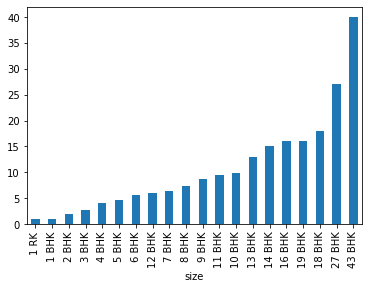

In [231]:
data.groupby(data["size"]).bath.mean().sort_values().plot(kind='bar')

In [232]:
data.pivot_table(values="bath", index = "size",aggfunc=(lambda x: mode(x).mode[0]))

,bath
size,
1 BHK,1.0
1 RK,1.0
10 BHK,10.0
11 BHK,6.0
12 BHK,6.0
13 BHK,13.0
14 BHK,15.0
16 BHK,16.0
18 BHK,18.0


In [233]:
data["bath"].isna().sum()

80

In [234]:
data["bath"]= data.groupby("size").bath.transform(lambda x : x.fillna(int(x.mean())))


In [235]:
data.loc[81]

area_type       Built-up  Area
availability            18-Oct
location           Hennur Road
size                     4 BHK
society                Gollela
total_sqft         2957 - 3450
bath                         4
balcony                    NaN
price                    224.5
data                     train
Name: 81, dtype: object

#balcony is 678 null ---> can be replaced by 0 since some time no balcony is available.
--------------------------------------

In [236]:
data[data["balcony"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.0,train
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0,train
9,Plot Area,Ready To Move,Gandhi Bazar,6 BHK,NaN,1020,6.0,NaN,370.0,train
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,Kantsce,1925,3.0,NaN,125.0,train
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,Gentson,1296,2.0,NaN,81.0,train
...,...,...,...,...,...,...,...,...,...,...
14778,Built-up Area,Ready To Move,Kithaganur,8 BHK,NaN,3500,7.0,NaN,NaN,test
14785,Super built-up Area,Ready To Move,Marathahalli,3 BHK,PuilaMi,1730,3.0,NaN,NaN,test
14787,Super built-up Area,Ready To Move,Kundalahalli,2 BHK,NaN,1588,2.0,NaN,NaN,test
14791,Super built-up Area,Ready To Move,Kalena Agrahara,3 BHK,KlarkBe,1731,3.0,NaN,NaN,test


In [237]:
data["balcony"].value_counts()

2.0    5657
1.0    5444
3.0    1861
0.0    1159
Name: balcony, dtype: int64

<AxesSubplot:xlabel='size'>

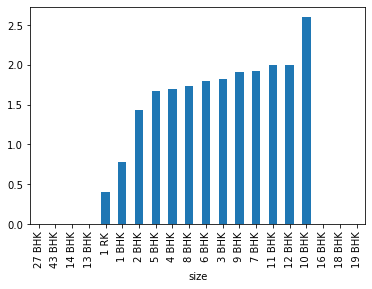

In [238]:

data.groupby(data["size"]).balcony.mean().sort_values().plot(kind='bar')

In [239]:
data.pivot_table(values="balcony", index = "size",aggfunc=(lambda x: mode(x).mode[0]))

,balcony
size,
1 BHK,1.0
1 RK,0.0
10 BHK,3.0
11 BHK,3.0
12 BHK,2.0
13 BHK,0.0
14 BHK,0.0
2 BHK,1.0
27 BHK,0.0


In [240]:
data["balcony"].replace({np.nan:0},inplace=True)

In [241]:
data["balcony"].isna().sum()

0

In [242]:
data.loc[14778]

area_type       Built-up  Area
availability     Ready To Move
location            Kithaganur
size                     8 BHK
society                    NaN
total_sqft                3500
bath                         7
balcony                      0
price                      NaN
data                      test
Name: 14778, dtype: object

#society is 6128, check location or train or test data--> fill with Unknown.
------------------------------------------------------------------------------------------------------

In [243]:
data["society"].isna().sum()

6128

In [244]:
data[data["society"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25,train
9,Plot Area,Ready To Move,Gandhi Bazar,6 BHK,NaN,1020,6.0,0.0,370.00,train
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00,train
...,...,...,...,...,...,...,...,...,...,...
14787,Super built-up Area,Ready To Move,Kundalahalli,2 BHK,NaN,1588,2.0,0.0,NaN,test
14789,Plot Area,Ready To Move,Akshayanagara West,8 BHK,NaN,1200,5.0,2.0,NaN,test
14792,Plot Area,18-Aug,Vishweswaraiah Layout 4th Block,1 BHK,NaN,1200,1.0,1.0,NaN,test
14793,Plot Area,Ready To Move,RMV 2nd Stage,4 BHK,NaN,6750,8.0,0.0,NaN,test


In [245]:
data["society"]= data["society"].fillna("unknown")

In [246]:
data[data["society"]=="unknown"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,unknown,1440,2.0,3.0,62.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,unknown,1200,2.0,1.0,51.00,train
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,unknown,1310,3.0,1.0,63.25,train
9,Plot Area,Ready To Move,Gandhi Bazar,6 BHK,unknown,1020,6.0,0.0,370.00,train
10,Super built-up Area,18-Feb,Whitefield,3 BHK,unknown,1800,2.0,2.0,70.00,train
...,...,...,...,...,...,...,...,...,...,...
14787,Super built-up Area,Ready To Move,Kundalahalli,2 BHK,unknown,1588,2.0,0.0,NaN,test
14789,Plot Area,Ready To Move,Akshayanagara West,8 BHK,unknown,1200,5.0,2.0,NaN,test
14792,Plot Area,18-Aug,Vishweswaraiah Layout 4th Block,1 BHK,unknown,1200,1.0,1.0,NaN,test
14793,Plot Area,Ready To Move,RMV 2nd Stage,4 BHK,unknown,6750,8.0,0.0,NaN,test


In [247]:
data.pivot_table(values="society",index="location",aggfunc=(lambda x: mode(x).mode[0]))

,society
location,
Anekal,unknown
Banaswadi,Krntsee
Basavangudi,unknown
Bhoganhalli,Rosha I
Devarabeesana Halli,Sorisa
...,...
vinayakanagar,unknown
"white field,kadugodi",unknown
whitefiled,unknown


In [248]:
data = data.reset_index().drop(columns="index")

# Data Preparation
-----------------------


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14799 entries, 0 to 14798
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14799 non-null  object 
 1   availability  14799 non-null  object 
 2   location      14799 non-null  object 
 3   size          14799 non-null  object 
 4   society       14799 non-null  object 
 5   total_sqft    14799 non-null  object 
 6   bath          14799 non-null  float64
 7   balcony       14799 non-null  float64
 8   price         13319 non-null  float64
 9   data          14799 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [250]:

data[data.duplicated()].sum()

area_type       Super built-up  AreaSuper built-up  AreaSuper ...
availability    Ready To MoveReady To MoveReady To MoveReady T...
location        Haralur RoadHaralur RoadVittasandraHaralur Roa...
size            3 BHK2 BHK2 BHK2 BHK2 BHK3 BHK3 BHK3 BHK3 BHK2...
society         NRowse unknownPrlla CunknownunknownGrrvaGrAkli...
total_sqft      1464102712461194102716931330107514641140116112...
bath                                                         1303
balcony                                                       906
price                                                     37397.6
data            traintraintraintraintraintraintraintraintraint...
dtype: object

In [251]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,unknown,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,unknown,1200,2.0,1.0,51.00,train
...,...,...,...,...,...,...,...,...,...,...
14794,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
14795,Super built-up Area,Ready To Move,Gottigere,3 BHK,unknown,1660,3.0,2.0,NaN,test
14796,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
14797,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


In [252]:
data.isna().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
price           1480
data               0
dtype: int64

In [253]:
data.nunique()

area_type          4
availability      82
location        1358
size              20
society         2833
total_sqft      2221
bath              19
balcony            4
price           1994
data               2
dtype: int64

In [254]:
data.select_dtypes(include = np.number).corr()

,bath,balcony,price
bath,1.000000,0.074087,0.456453
balcony,0.074087,1.000000,0.019656
price,0.456453,0.019656,1.000000


<AxesSubplot:>

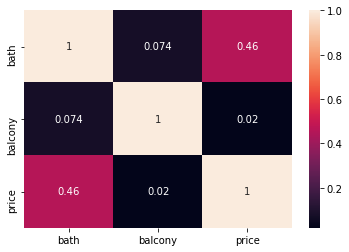

In [255]:
sns.heatmap(data.corr(),annot=True)

In [256]:

numeric_data_columns=data.select_dtypes(include=np.number).drop(columns="price").columns

In [257]:
numeric_data_columns


Index(['bath', 'balcony'], dtype='object')

In [258]:

#Category_data_columns=
data.select_dtypes(exclude=np.number).drop(columns=["data"]).columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [259]:

category_data_columns=data.select_dtypes(exclude=np.number).drop(columns=["data"]).columns

In [260]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [261]:
scaler = StandardScaler()

In [262]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [263]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["data","price"]]], axis = 1)

In [264]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [265]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [266]:
train_preprocessed = train_preprocessed.drop(columns = ["data"])

In [267]:
test_preprocessed = test_preprocessed.drop(columns = ["data","price"])

In [268]:
train_preprocessed.to_csv("train_preprocessed.csv")
test_preprocessed.to_csv("test_preprocessed.csv")

In [269]:
train_preprocessed.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,bath,balcony,price
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.518852,-0.588598,39.07
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.713699,1.721310,120.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.518852,1.721310,62.00
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.225332,-0.588598,95.00
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.518852,-0.588598,51.00


In [270]:
test_preprocessed .head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,bath,balcony
13319,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,0.566356
13320,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.690434,0.566356
13321,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.713699,0.566356
13322,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.225332,-0.588598
13323,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,-0.588598


#MODEL
--------------------

#Linear
---------------

In [271]:
model = LinearRegression()

In [272]:
X = train_preprocessed.drop(columns=["price"])

In [273]:
y = train_preprocessed["price"]

In [274]:
model.fit(X,y)


LinearRegression()

In [289]:
y_Line_pred=model.predict(X)

In [290]:
mean_squared_error(y, y_Line_pred,squared=False)

45.49058790190912

In [291]:
r2_score(y, y_Line_pred)

0.9067525978277481

#Lasso
--------------

In [287]:
model1 = Lasso(1)


In [288]:
model1.fit(X,y)

Lasso(alpha=1)

In [292]:
y_Lasso_pred=model1.predict(X)

In [293]:
mean_squared_error(y, y_Lasso_pred,squared=False)

125.88931962753426

In [294]:
r2_score(y, y_Lasso_pred)

0.28587964011448685

#Ridge
---------


In [296]:
model2 = Ridge(alpha=2)
model2.fit(X, y)

Ridge(alpha=2)

In [297]:
y_Ridge_pred=model2.predict(X)

In [298]:
mean_squared_error(y, y_Ridge_pred,squared=False)

68.60327184620354

In [299]:
r2_score(y, y_Ridge_pred)

0.7879280157972771

#Elastic Net
--------------------

In [300]:
model3 = ElasticNet(l1_ratio=.5, alpha=1)
model3.fit(X, y)

ElasticNet(alpha=1)

In [301]:
y_elast_pred=model3.predict(X)

In [302]:
mean_squared_error(y, y_elast_pred,squared=False)

131.65877225769896

In [303]:
r2_score(y, y_elast_pred)

0.21892408870934454

In [305]:
X.head(10)

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,bath,balcony
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,-0.588598
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.713699,1.721310
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,1.721310
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.225332,-0.588598
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,-0.588598
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,-0.588598
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.969516,-1.743552
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.969516,-1.743552
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.225332,-0.588598
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.457883,-1.743552


#Prediction of Test data
---------------------------------------

In [306]:
X_test = test_preprocessed 

In [307]:
X_test

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,...,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,bath,balcony
13319,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,0.566356
13320,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.690434,0.566356
13321,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.713699,0.566356
13322,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.225332,-0.588598
13323,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,-0.588598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,-0.588598
14795,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.225332,0.566356
14796,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.518852,0.566356
14797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.518852,-0.588598


Create Y (price) Prediction of Test data using diff model
-------------------------------------------------------------------------------------

In [309]:

y_test_Line_pred=model.predict(X_test)#Linear Prediction
y_test_Lasso_pred=model1.predict(X_test)#Lasso Prediction
y_test_Ridge_pred=model2.predict(X_test)#Ridge Prediction
y_test_elast_pred=model3.predict(X_test)#Elastic Prediction

In [316]:
test

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,data
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN,test
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN,test
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN,test
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN,test
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN,test
...,...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN,test
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN,test
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN,test
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN,test


#Create Submission file (from Test file)
--------------------------------------------------------

In [314]:
submission_Linear=test.copy().drop(columns="data")
submission_Lasso=test.copy().drop(columns="data")
submission_Ridge=test.copy().drop(columns="data")
submission_elast=test.copy().drop(columns="data")

In [315]:
submission_Lasso

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN


#Add Y(price) into submission file which was null(nan) 
------------------------------------------------------------------------------

In [317]:
submission_Linear["price"]=np.abs(y_test_Line_pred)
submission_Lasso["price"]=np.abs(y_test_Lasso_pred)
submission_Ridge["price"]=np.abs(y_test_Ridge_pred)
submission_elast["price"]=np.abs(y_test_elast_pred)


#Valdiate Y(Price) predcition added into submission file 
-------------------------------------------------------------------------------------

In [318]:
submission_Lasso

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,62.912909
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,361.590553
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,311.470354
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,116.627239
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,62.912909
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,62.912909
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,116.627239
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,62.912909
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,62.912909


#Create CSV file for submission
------------------------------------------------------

In [319]:
submission_Linear.to_csv("linear_regression_result.csv", index = False)
submission_Lasso.to_csv("lasso_regression_result.csv", index = False)
submission_Ridge.to_csv("ridge_regression_result.csv", index = False)
submission_elast.to_csv("elastic net_regression_result.csv", index = False)

#upload submission file
------------------------------------

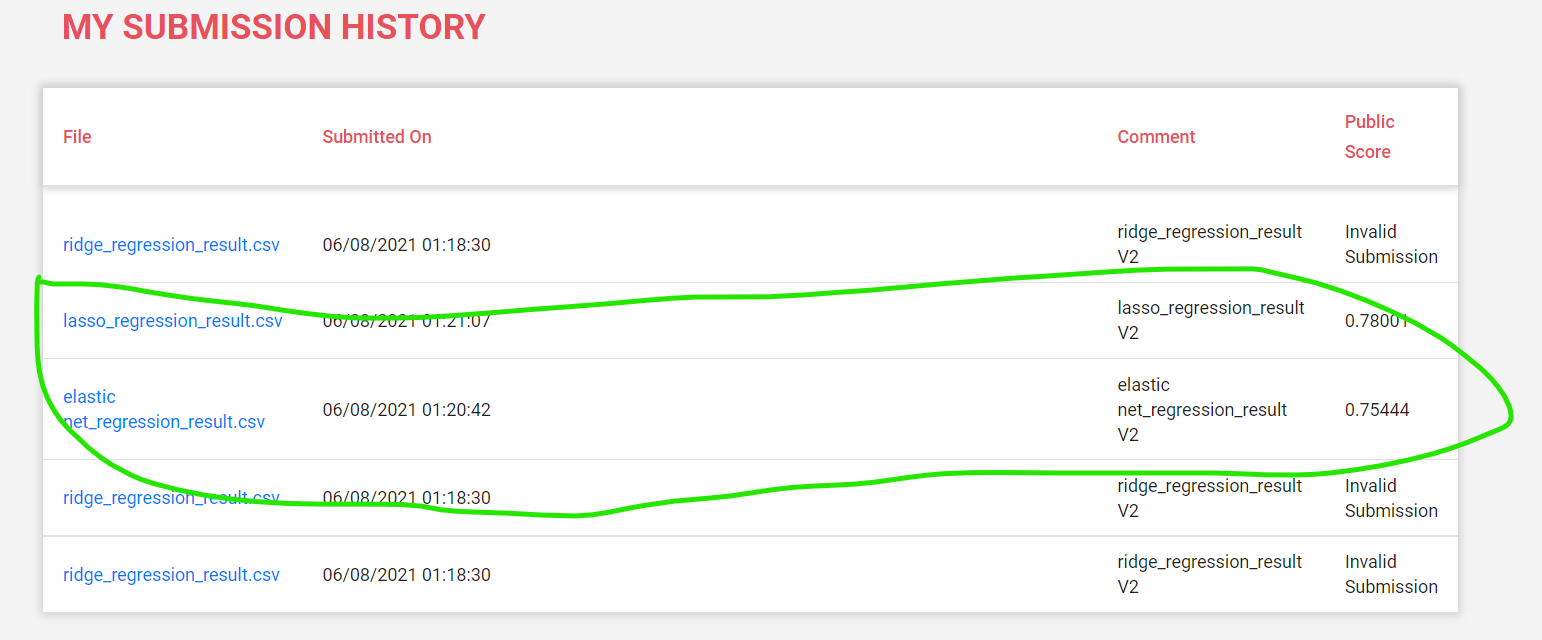

In [320]:
from IPython.display import Image
Image(filename='Submission Screen shots.png')